
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь").**


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [11]:
print("Female -", data[data['Sex'] == 'female']['Sex'].count())
print("Male -", data[data['Sex'] == 'male']['Sex'].count())

Female - 314
Male - 577


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

Text(0.5, 0.98, 'General')

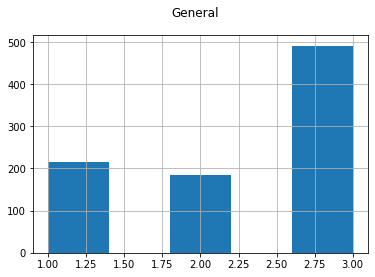

In [12]:
import pylab as pl
data['Pclass'].hist(bins=5)
pl.suptitle("General")

Text(0.5, 0.98, 'Males')

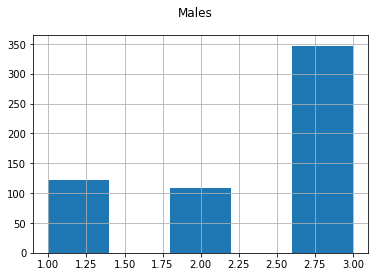

In [13]:
data[data['Sex'] == 'male']['Pclass'].hist(bins=5)
pl.suptitle("Males")

Text(0.5, 0.98, 'Females')

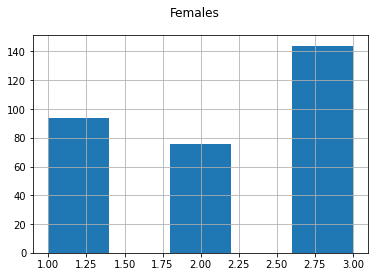

In [14]:
data[data['Sex'] == 'female']['Pclass'].hist(bins=5)
pl.suptitle("Females")

In [15]:
print("2 class males -", data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Pclass'].count())

2 class males - 108


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [16]:
print("Median -", round(data['Fare'].median(), 2))
print("Std -", round(data['Fare'].std(), 2))

Median - 14.45
Std - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [17]:
print("Among under 30 -", round(data[(data['Age'] < 30) & (data['Survived'])].count()['Age'] *100 / data[data['Age'] < 30].count()['Age'], 1), "%")
print("Among over 60 -", round(data[(data['Age'] > 60) & (data['Survived'])].count()['Age'] *100 / data[data['Age'] > 60].count()['Age'], 1), "%")

Among under 30 - 40.6 %
Among over 60 - 22.7 %


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [18]:
print("Among males -", round(data[(data['Sex'] == 'male') & (data['Survived'])].count()['Sex'] *100 / data[data['Sex'] == 'male'].count()['Sex'], 1), "%")
print("Among females -", round(data[(data['Sex'] == 'female') & (data['Survived'])].count()['Sex'] *100 / data[data['Sex'] == 'female'].count()['Sex'], 1), "%")

Among males - 18.9 %
Among females - 74.2 %


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [19]:
def FirstName(name):
    begin = name.index('.') + 2
    word = ''
    while(name[begin] != ' '):
        word += name[begin]
        begin += 1
        if(begin > len(name) - 1): break
    return word.split(' ')
                
data[(data['Sex'] == 'male')]['Name'].map(FirstName).explode().value_counts()

William     35
John        25
George      14
Charles     13
Thomas      13
            ..
Thornton     1
Percy        1
Janko        1
Bengt        1
Ilmari       1
Name: Name, Length: 287, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

Text(0.5, 0.98, 'Fares of survived')

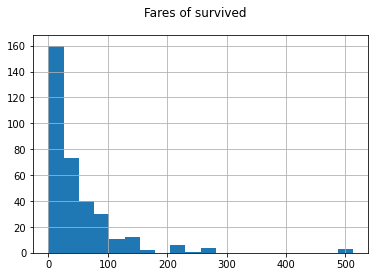

In [20]:
data[data['Survived'] == 1]['Fare'].hist(bins=20)
pl.suptitle("Fares of survived")

Text(0.5, 0.98, 'Fares of dead')

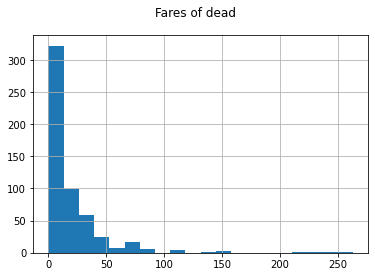

In [21]:
data[data['Survived'] == 0]['Fare'].hist(bins=20)
pl.suptitle("Fares of dead")

mean - 28.3


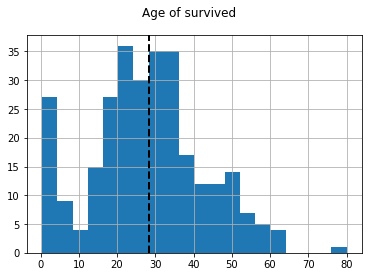

In [22]:
import matplotlib
import matplotlib.pyplot as plt

data[data['Survived'] == 1]['Age'].hist(bins=20)
mean = data[data['Survived'] == 1]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("Age of survived")
print("mean -", round(mean, 1))

mean - 30.6


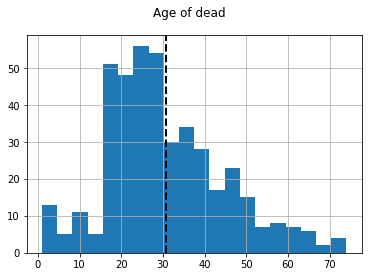

In [23]:
data[data['Survived'] == 0]['Age'].hist(bins=20)
mean = data[data['Survived'] == 0]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("Age of dead")
print("mean -", round(mean, 1))

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [24]:
print("1)", round(data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean(), 1))

1) 41.3


In [25]:
print("2)", round(data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean(), 1))

2) 34.6


Поскольку для 1 класса данные известны из 1 и 2 пунктов, проверим 2 и 3 классы:

mean - 30.7


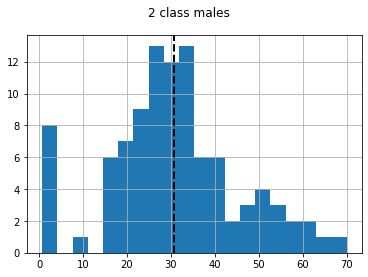

In [26]:
import matplotlib
import matplotlib.pyplot as plt

data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].hist(bins=20)
mean = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("2 class males")
print("mean -", round(mean, 1))

mean - 28.7


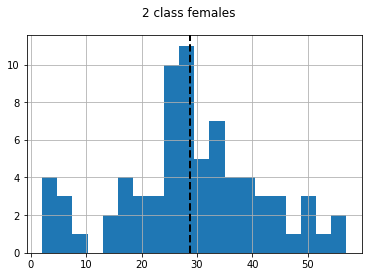

In [27]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].hist(bins=20)
mean = data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("2 class females")
print("mean -", round(mean, 1))

mean - 26.5


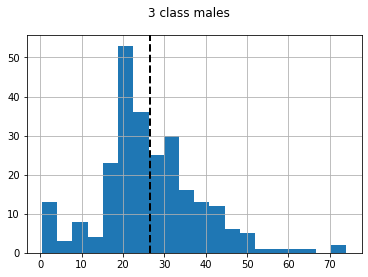

In [28]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].hist(bins=20)
mean = data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("3 class males")
print("mean -", round(mean, 1))

mean - 21.8


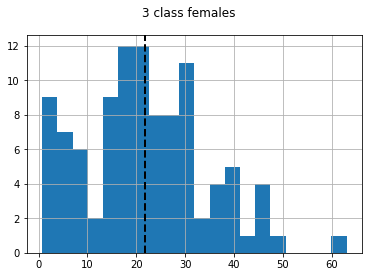

In [29]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].hist(bins=20)
mean = data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("3 class females")
print("mean -", round(mean, 1))

Построим гистограммы возрастов для всех классов:

mean - 38.2


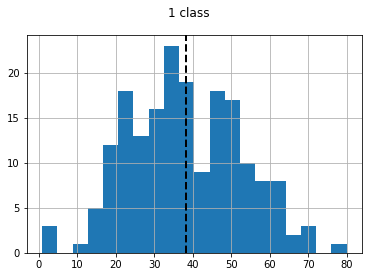

In [30]:
data[data['Pclass'] == 1]['Age'].hist(bins=20)
mean = data[data['Pclass'] == 1]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("1 class")
print("mean -", round(mean, 1))

mean - 29.9


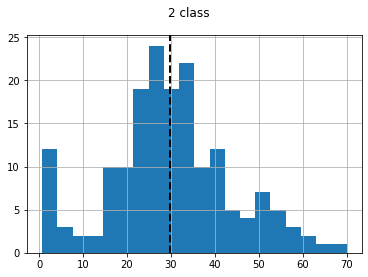

In [31]:
data[data['Pclass'] == 2]['Age'].hist(bins=20)
mean = data[data['Pclass'] == 2]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("2 class")
print("mean -", round(mean, 1))

mean - 25.1


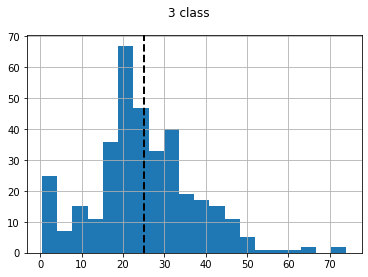

In [32]:
data[data['Pclass'] == 3]['Age'].hist(bins=20)
mean = data[data['Pclass'] == 3]['Age'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
pl.suptitle("3 class")
print("mean -", round(mean, 1))

3) True
4) True